Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'SOL1'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-09,1.313487,0.694187,0.832005,0.951054,87364276.0,0.951054
2020-04-10,1.049073,0.765020,0.951054,0.776819,43862444.0,0.776819
2020-04-11,0.956670,0.762426,0.785448,0.882507,38736897.0,0.882507
2020-04-12,0.891603,0.773976,0.890760,0.777832,18211285.0,0.777832
2020-04-13,0.796472,0.628169,0.777832,0.661925,16747614.0,0.661925
...,...,...,...,...,...,...
2021-06-16,41.237431,38.286083,39.689270,39.264591,417775600.0,39.264591
2021-06-17,39.427128,35.004017,39.266785,36.648796,424163369.0,36.648796
2021-06-18,37.354588,34.981606,36.819107,35.353436,264640750.0,35.353436


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2020-04-09 to 2021-06-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       410 non-null    float64
 1   Low        410 non-null    float64
 2   Open       410 non-null    float64
 3   Close      410 non-null    float64
 4   Volume     410 non-null    float64
 5   Adj Close  410 non-null    float64
 6   Spread     410 non-null    float64
dtypes: float64(7)
memory usage: 25.6 KB


## Plot the closing value of Solana over time

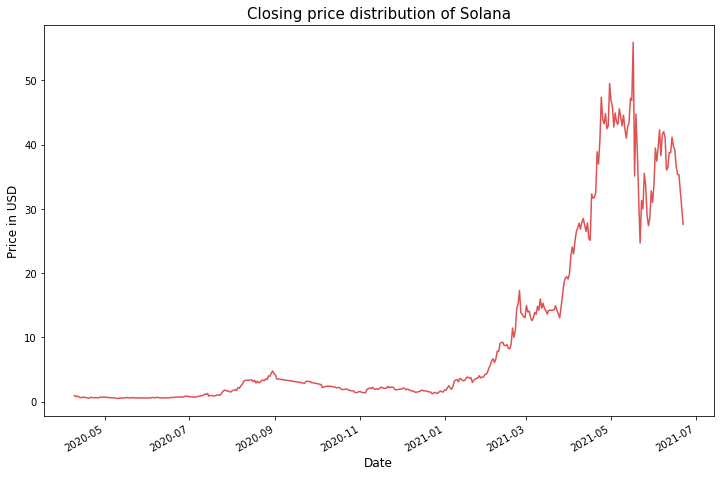

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Solana", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-09,1.313487,0.694187,0.832005,0.951054,87364276.0,0.951054
2020-04-10,1.049073,0.765020,0.951054,0.776819,43862444.0,0.776819
2020-04-11,0.956670,0.762426,0.785448,0.882507,38736897.0,0.882507
2020-04-12,0.891603,0.773976,0.890760,0.777832,18211285.0,0.777832
2020-04-13,0.796472,0.628169,0.777832,0.661925,16747614.0,0.661925
...,...,...,...,...,...,...
2021-06-16,41.237431,38.286083,39.689270,39.264591,417775600.0,39.264591
2021-06-17,39.427128,35.004017,39.266785,36.648796,424163369.0,36.648796
2021-06-18,37.354588,34.981606,36.819107,35.353436,264640750.0,35.353436


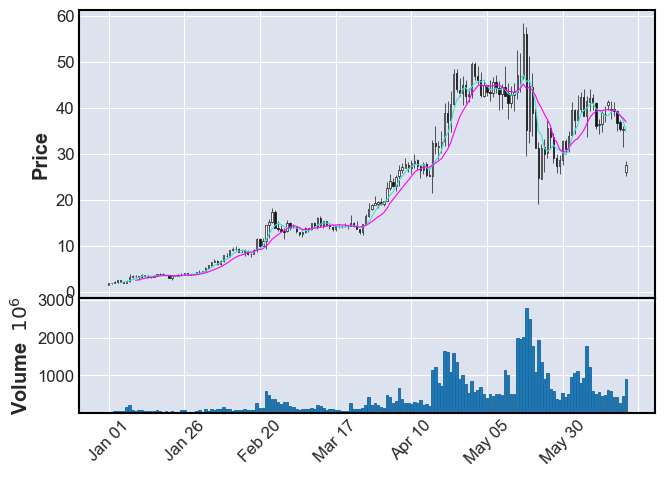

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
239,2021-01-02,1.799275
240,2021-01-03,2.161752
241,2021-01-04,2.485097
242,2021-01-05,2.157217
243,2021-01-06,1.929217
...,...,...
405,2021-06-16,39.264591
406,2021-06-17,36.648796
407,2021-06-18,35.353436
408,2021-06-19,35.322014


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
172,2021-06-25,34.383132,30.132917,38.146300
173,2021-06-26,34.779787,30.543715,38.824045
174,2021-06-27,34.693919,30.857095,38.616974
175,2021-06-28,35.536483,31.458083,39.928258
176,2021-06-29,34.078831,29.588899,38.102557


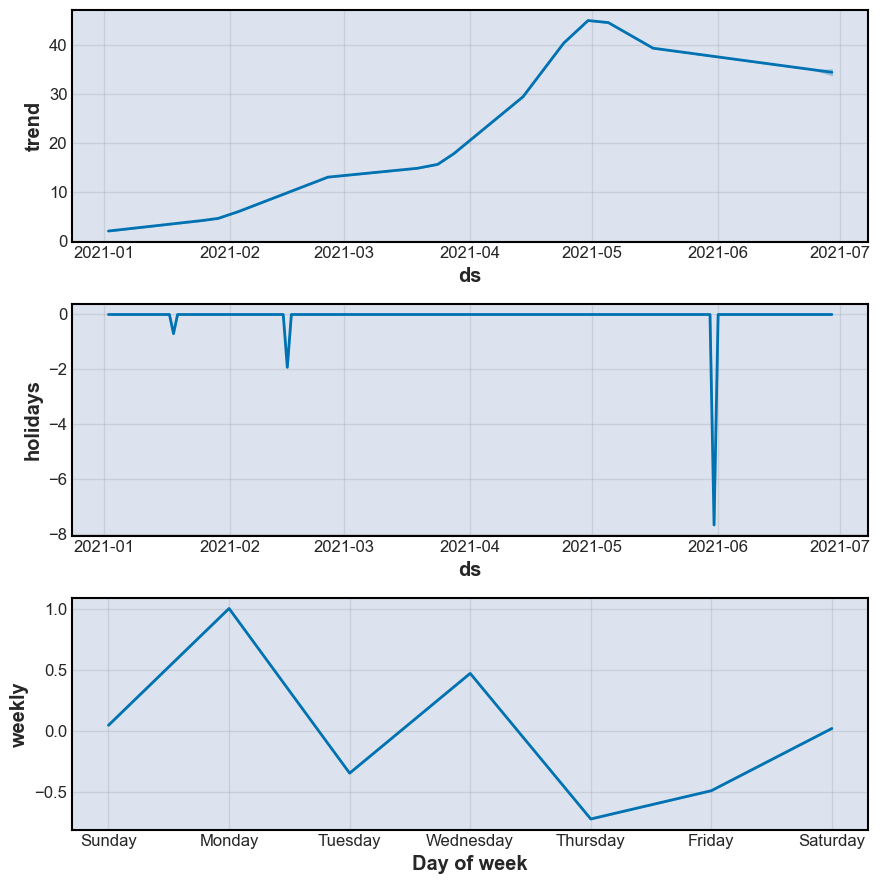

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

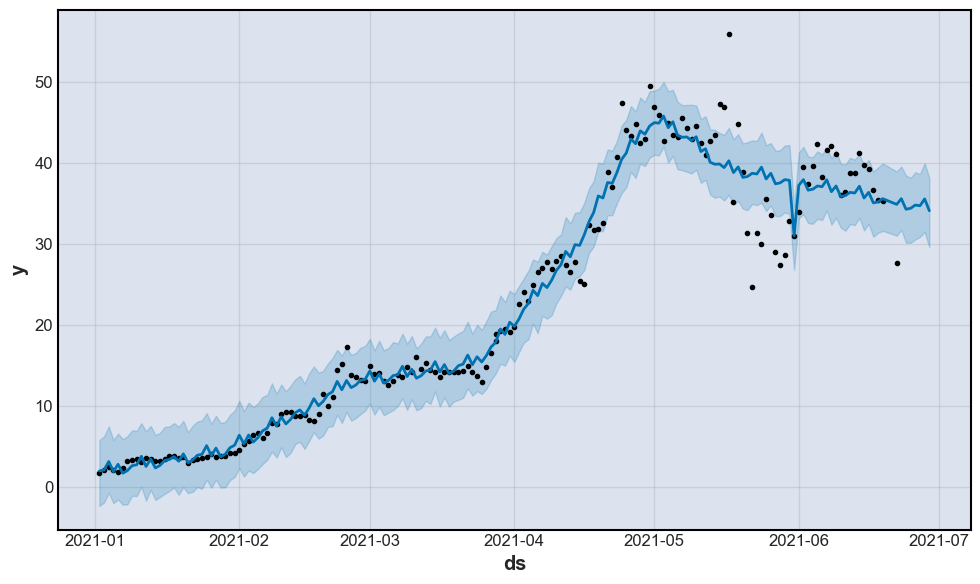

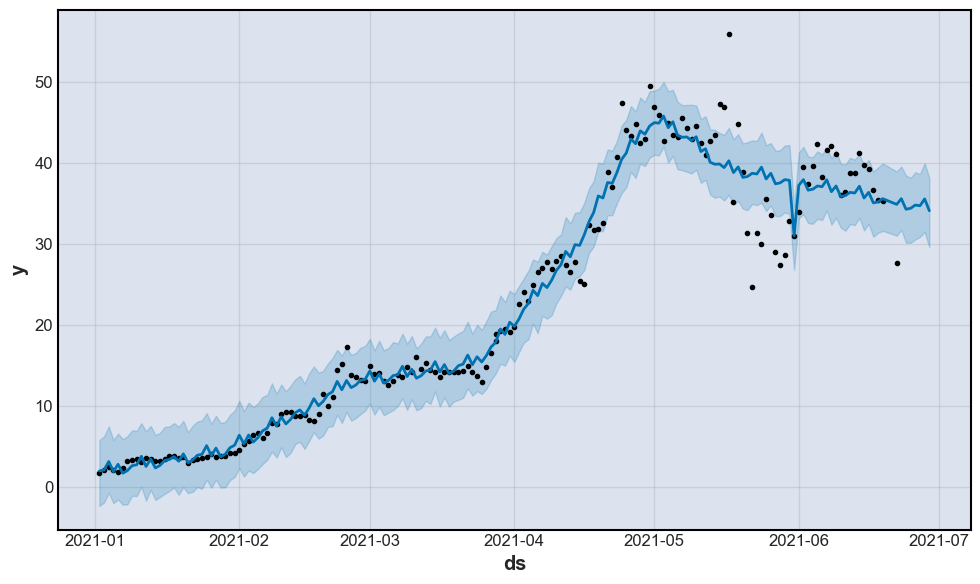

In [10]:
m.plot(forecast)